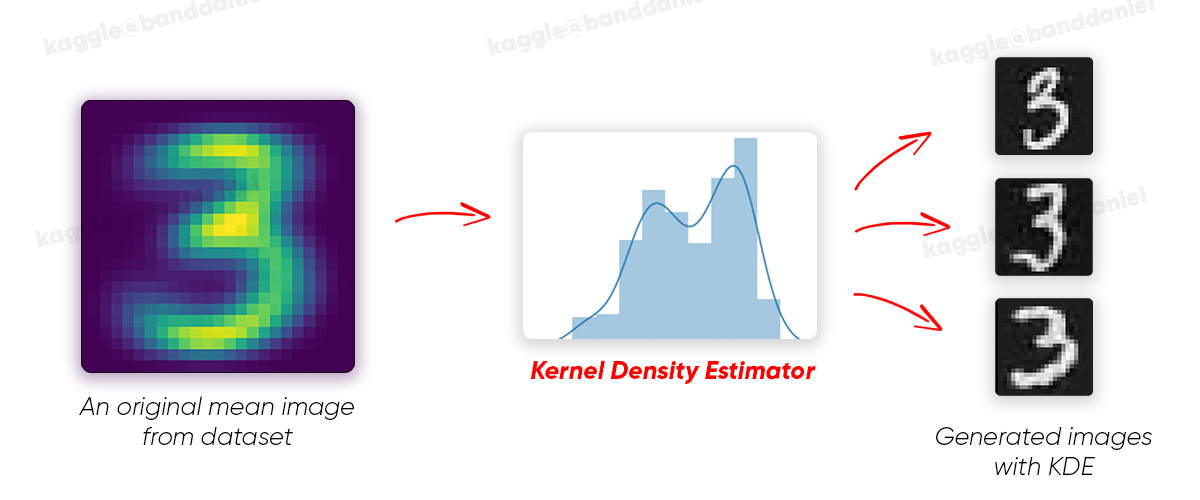

I tried to create <b>a basic sample data generator with Kernel Density Estimation</b>. Main goal of this project is creating new samples from original distribution of data. Kernel density is very handy for sampling from discrete distribution.

This project based on this example from sklearn docs -> https://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html<br>
My similar project using Fashion MNIST is there -> https://www.kaggle.com/banddaniel/simple-new-sample-generation-fashionmnist-w-kde
<br/>
<hr>
<h3>In this method, I follow these steps;</h3>
1. StandardScaler for scaling data.<br>
2. PCA for reducing dimension <span style="color:red">(..., 784) -> (..., 350)</span> I chose 350 component with trial and error.<br>
3. Applying KDE with gaussian kernel and 0.1 bandwith.<br>
4. Inversing all transform.<br>



In [1]:
# Importing dependencies

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Reading and showing data

data = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# For splitting data into class by class
# label_no: class name, exp 2...

def create_class_df(label_no):
    data_new = data[data.label == label_no].reset_index()
    data_label = data_new['label']
    data_new = data_new.drop(['label','index'], axis=1)
    
    return data_new

In [4]:
# Creating data class by class

train_0_data = create_class_df(0)
train_1_data = create_class_df(1)
train_2_data = create_class_df(2)
train_3_data = create_class_df(3)
train_4_data = create_class_df(4)
train_5_data = create_class_df(5)
train_6_data = create_class_df(6)
train_7_data = create_class_df(7)
train_8_data = create_class_df(8)
train_9_data = create_class_df(9)

In [5]:
train = pd.DataFrame(train_0_data)
train

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# This function using for new sample from correspondent class.
# Parameters df:data, sample_number: samples number derive from KDE.

def class_kde_sample_pipeline(df ,sample_number ):
        
    SC = StandardScaler()
    data_scaled = SC.fit_transform(df)
    
    PCA_ = PCA(n_components = 350)
    data_scaled_PCA = PCA_.fit_transform(data_scaled)
    
    KDE = KernelDensity(bandwidth = 0.1)
    KDE_data = KDE.fit(data_scaled_PCA)
    
    samples_data = KDE_data.sample(sample_number)
    samples_data_orig = PCA_.inverse_transform(samples_data)
    inv_SC = SC.inverse_transform(samples_data_orig)
    
    return inv_SC

In [7]:
# Generating new 500 sample each class

new_0_data = class_kde_sample_pipeline(train_0_data, 500)
new_1_data = class_kde_sample_pipeline(train_1_data, 500)
new_2_data = class_kde_sample_pipeline(train_2_data, 500)
new_3_data = class_kde_sample_pipeline(train_3_data, 500)
new_4_data = class_kde_sample_pipeline(train_4_data, 500)
new_5_data = class_kde_sample_pipeline(train_5_data, 500)
new_6_data = class_kde_sample_pipeline(train_6_data, 500)
new_7_data = class_kde_sample_pipeline(train_7_data, 500)
new_8_data = class_kde_sample_pipeline(train_8_data, 500)
new_9_data = class_kde_sample_pipeline(train_9_data, 500)

In [8]:
# Using for create a random sample from a numpy array

def get_random_sample(df):
    idx = random.randint(0, len(df)-1)
    sample = df[idx]
    sample = np.array(sample)
    sample = sample.reshape(28,28)
    return sample

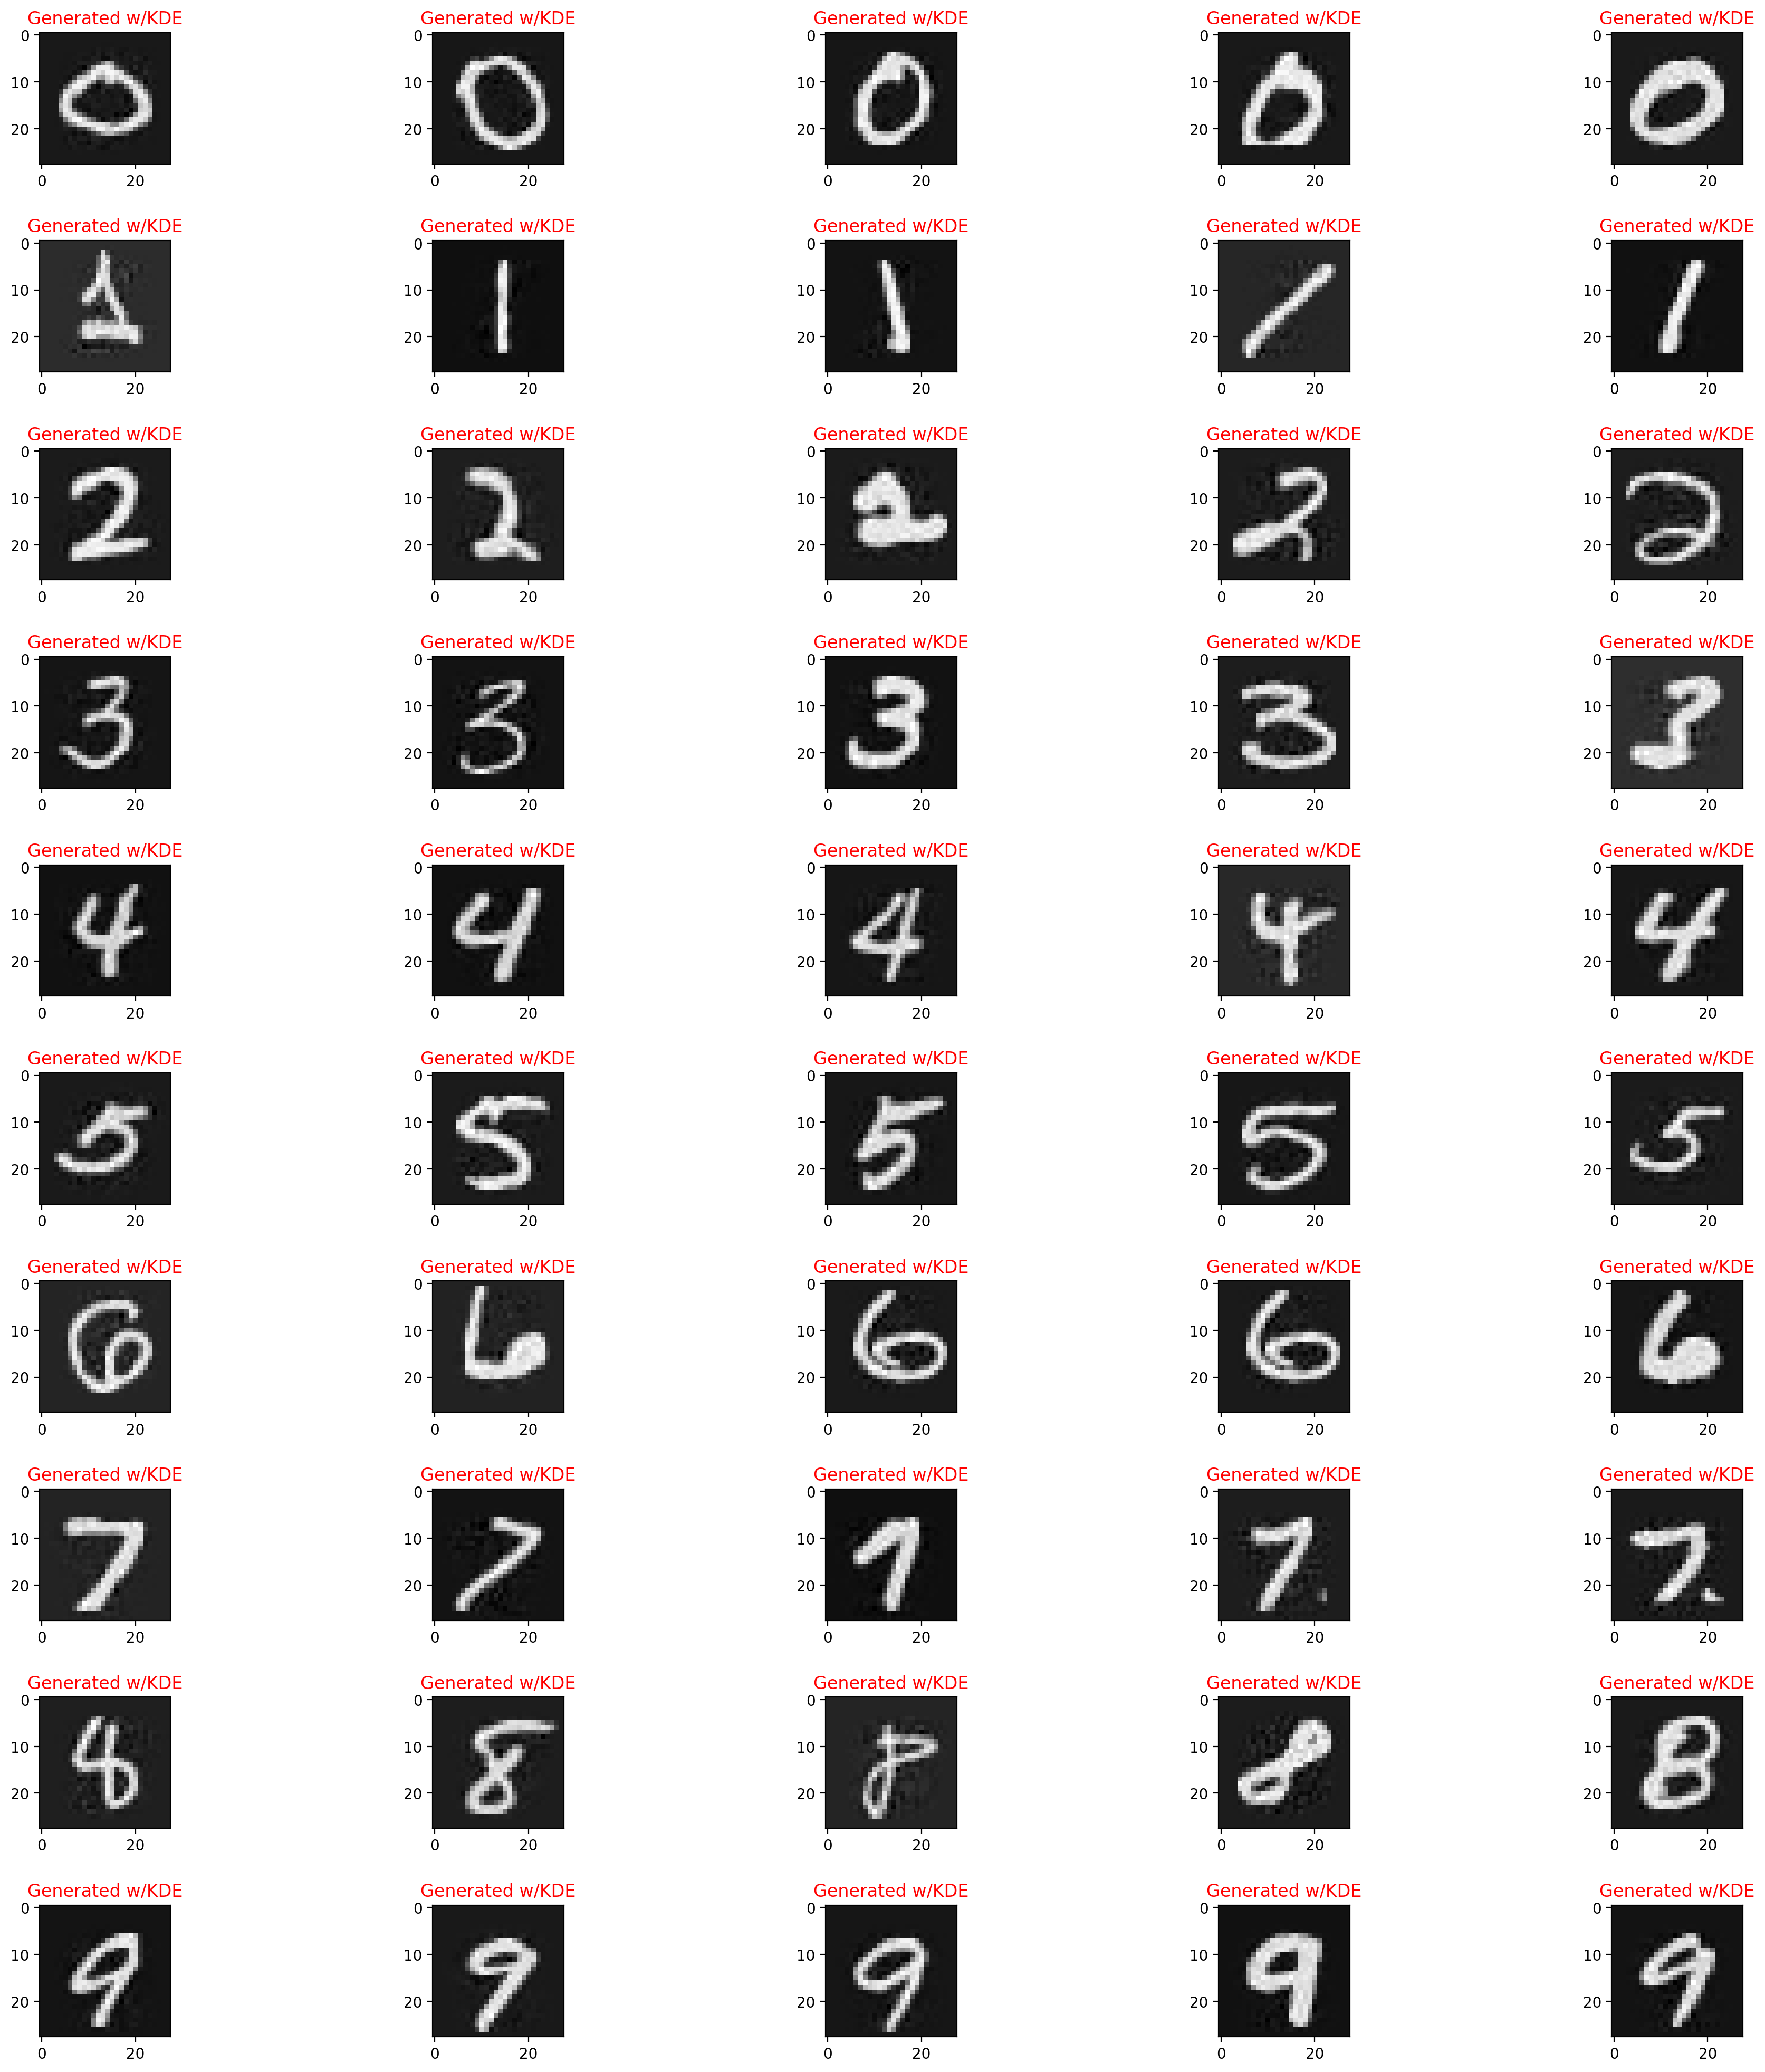

In [9]:
# Plotting random samples from each class that creating with KDE

generated_data = [new_0_data, new_1_data, new_2_data,new_3_data ,new_4_data,
                  new_5_data, new_6_data, new_7_data, new_8_data, new_9_data]



fig, axs = plt.subplots(10,5 ,figsize=(20,20), dpi=200 )

count=0

for m in range(10):
    for i in range(5):     
        axs[count][i].imshow(get_random_sample(generated_data[m]) , cmap='gray')
        axs[count][i].set_title('Generated w/KDE', color = 'red')
        
    count +=1
fig.tight_layout(pad=2.0)
